Epoch 10, Average Loss: 0.0237737660168896
Epoch 20, Average Loss: 0.01642625831425113
Epoch 30, Average Loss: 0.016081341819350205
Epoch 40, Average Loss: 0.015970919374334258
Epoch 50, Average Loss: 0.015870701569317764
Epoch 60, Average Loss: 0.015770586140864087
Epoch 70, Average Loss: 0.015669803747592498
Epoch 80, Average Loss: 0.015568288937802792
Epoch 90, Average Loss: 0.015466045256721336
Epoch 100, Average Loss: 0.015363083579177
Epoch 110, Average Loss: 0.01525941649803648
Epoch 120, Average Loss: 0.015155058057640452
Epoch 130, Average Loss: 0.015050023840831263
Epoch 140, Average Loss: 0.014944331034214078
Epoch 150, Average Loss: 0.014837998472896748
Epoch 160, Average Loss: 0.014731046673698416
Epoch 170, Average Loss: 0.014623497859406842
Epoch 180, Average Loss: 0.014515375974561422
Epoch 190, Average Loss: 0.014406706692778796
Epoch 200, Average Loss: 0.014297517415579653
Epoch 210, Average Loss: 0.014187837262698648
Epoch 220, Average Loss: 0.014077697053896956
Epoc

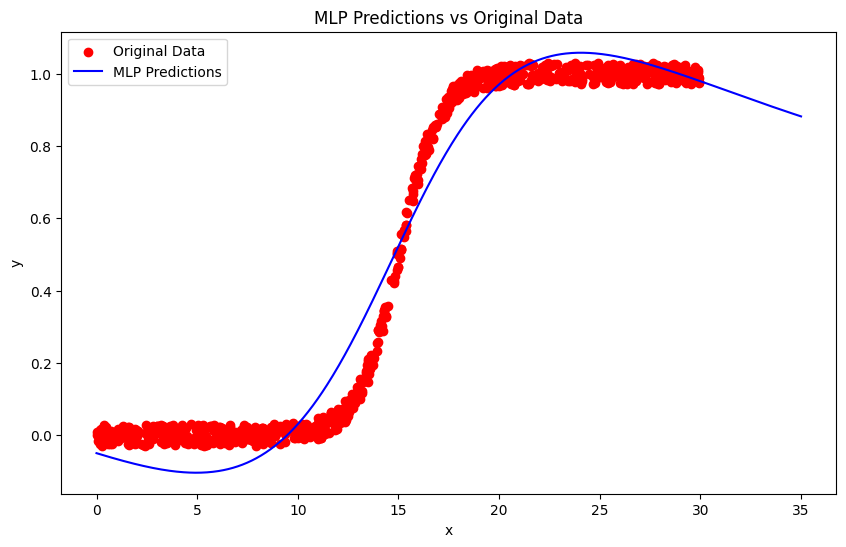

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class MLP:
    def __init__(self, layer_sizes, type="sigmoid"):
        self.layers = []
        self.activations = []
        self.type=type
        for i in range(len(layer_sizes) - 1):
            weight = np.random.randn(layer_sizes[i], layer_sizes[i+1]) * np.sqrt(2. / layer_sizes[i])#He初始化
            bias = np.zeros((1, layer_sizes[i+1]))
            self.layers.append({'W': weight, 'b': bias})

    def ReLU(self, z):
        return np.maximum(0, z)

    def ReLU_derivative(self, z):
        return (z > 0).astype(float)

    def tanh(self, z):
        return np.tanh(z)

    def tanh_derivative(self, z):
        return 1 - np.tanh(z) ** 2

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))

    def select_acf(self, z):
        if self.type == 'sigmoid':
            return self.sigmoid(z)
        if self.type == 'tanh':
            return self.tanh(z)
        if self.type == 'ReLU':
            return self.ReLU(z)
        else:
            print("wrong type input")

    def select_derivative(self, z):
        if self.type == 'sigmoid':
            return self.sigmoid_derivative(z)
        if self.type == 'tanh':
            return self.tanh_derivative(z)
        if self.type == 'ReLU':
            return self.ReLU_derivative(z)
        else:
            print("wrong type input")

    def forward(self, X):
        activation = X
        self.activations = [X]
        for layer in self.layers[:-1]:  
            z = np.dot(activation, layer['W']) + layer['b']
            activation = self.select_acf(z)
            self.activations.append(activation)
        # Linear output on last layer
        final_layer = self.layers[-1]
        z = np.dot(activation, final_layer['W']) + final_layer['b']   #最后一层直接线性输出

        activation = z 
        self.activations.append(activation)
        return activation

    def compute_loss(self, Y, Y_hat):
        return ((Y - Y_hat) ** 2).mean()

    def backward(self, X, Y, Y_hat, learning_rate=0.01):
        
        delta = 2 * (Y_hat - Y)
        for i in reversed(range(len(self.layers))):
            current_activation = self.activations[i+1]
            prev_activation = self.activations[i]

            if i != len(self.layers) - 1:  # 如果不是输出层，应用激活函数的导数
                delta *= self.select_derivative(current_activation)#BP1&2

            delta_propagate = np.dot(delta, self.layers[i]['W'].T) if i > 0 else None#BP2

            
            d_W = np.dot(prev_activation.T, delta)#BP3
            d_b = delta#BP4
           
            self.layers[i]['W'] -= learning_rate * d_W
            self.layers[i]['b'] -= learning_rate * d_b

            
            delta = delta_propagate


layer_sizes = [1, 100,100 ,1]


mlp = MLP(layer_sizes)

data_path = 'function3.csv'
data = pd.read_csv(data_path)
X = data['x'].values.reshape(-1, 1)
Y = data['y'].values.reshape(-1, 1)


X_mean = X.mean()#归一化
X_std = X.std()
X_normalized = (X - X_mean) / X_std

Y_mean = Y.mean()
Y_std = Y.std()
Y_normalized = (Y - Y_mean) / Y_std

epochs = 1000  
learning_rate = 0.0005

for epoch in range(epochs):
    total_loss = 0
    for i in range(len(X)):
        input_x = X_normalized[i].reshape(1, -1)  # 使用归一化的输入
        target_y = Y_normalized[i].reshape(1, -1)  # 使用归一化的目标
        Y_hat = mlp.forward(input_x)  # 前向传播
        loss = mlp.compute_loss(target_y, Y_hat)  # 计算损失
        mlp.backward(input_x, target_y, Y_hat, learning_rate)
        total_loss += loss
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}, Average Loss: {total_loss / len(X)}')



x_line=np.linspace(0, 35, 600).reshape(-1, 1)
x_values_normalized = (x_line - X_mean) / X_std
predictions_normalized = mlp.forward(x_values_normalized)
predictions = predictions_normalized * Y_std + Y_mean  # 逆归一化预测值



plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='red', label='Original Data')  # 使用原始数据
plt.plot(x_line, predictions, color='blue', label='MLP Predictions')  # 使用逆归一化的预测
plt.title('MLP Predictions vs Original Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
